In [1]:
import sys
%matplotlib inline
sys.path.append("/usr/gapps/spot/dev/hatchet-venv/x86_64/lib/python3.9/site-packages/") # <-- Python packages
sys.path.append("/usr/gapps/spot/dev/hatchet/x86_64/") # <-- Hatchet
sys.path.append("/g/g91/nansamba1/thicket/") # <-- Thicket

from glob import glob

import pandas as pd

import thicket as th
import hatchet as ht

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [2]:
ht
th
th.__version__

'2024.2.1'

In [3]:
import glob
kripke_files_strong = "/usr/workspace/nansamba1/dane-2-6-25/kripke-benchmark-strong-openmp/dane-system/workspace/experiments/kripke/kripke"
kripke_cali_files_strong = glob.glob(f"{kripke_files_strong}/**/*.cali", recursive=True)
tk_kripke_strong_scaling = th.Thicket.from_caliperreader(kripke_cali_files_strong, string_attributes="loop")

kripke_files_weak = "/usr/workspace/nansamba1/dane-2-6-25/kripke-benchmark-weak-openmp/dane-system/workspace/experiments/kripke/kripke"
kripke_cali_files_weak = glob.glob(f"{kripke_files_strong}/**/*.cali", recursive=True)
kripke_cali_files_weak = [file for file in kripke_cali_files_weak if '512' not in file]
tk_kripke_weak_scaling = th.Thicket.from_caliperreader(kripke_cali_files_weak, string_attributes="loop")

#laghos_files_strong = "/usr/workspace/nansamba1/Dane-2-4-25/Laghos-benchpark/dane-system/workspace/experiments/laghos/triplept"
laghos_files = "/usr/workspace/nansamba1/tioga-2-12-25/laghos-benchmark-tioga/tioga-system/workspace/experiments/laghos/triplept"
laghos_cali_files = glob.glob(f"{laghos_files}/**/*.cali", recursive=True)
tk_laghos_strong_scaling = th.Thicket.from_caliperreader(laghos_cali_files, string_attributes="loop")

laghos_files_dane = "/usr/workspace/nansamba1/dane-2-14-25/laghos-benchmark-dane/dane-system/workspace/experiments/laghos/triplept"
laghos_cali_files_dane = glob.glob(f"{laghos_files_dane}/**/*.cali", recursive=True)
tk_laghos_strong_scaling_dane = th.Thicket.from_caliperreader(laghos_cali_files_dane, string_attributes="loop")

#Read in Kripke data
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10_4_24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_dane_2-6-25/kripke/openmp/LLNL-Dane-DELL-sapphirerapids-OmniPath/workspace/experiments/kripke/kripke"
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_dane_12-5-24/kripke/openmp/LLNL-Dane-DELL-sapphirerapids-OmniPath/workspace/experiments/kripke/kripke"
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_11-16-24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
#kripke_cali_files = glob.glob(f"{kripke_files}/**/*.cali", recursive=True)
#kripke_strong = [file for file in kripke_cali_files if 'strong' in  file]
#kripke_weak = [file for file in kripke_cali_files if 'weak' in file]
#kripke_strong_scaling = th.Thicket.from_caliperreader(kripke_strong, string_attributes="loop")
#kripke_weak_scaling = th.Thicket.from_caliperreader(kripke_weak, string_attributes="loop")

(2/2) Creating Thicket: 100%|██████████| 3/3 [00:00<00:00, 33.83it/s]


In [4]:
available_columns = tk_laghos_strong_scaling.show_metric_columns()
print(available_columns)

['Calls/rank (min)', 'Irecv gap (max)', 'Bytes recv (max)', 'Sends (total)', 'Bytes sent (max)', 'Recvs (max)', 'Dst ranks (min)', 'Dst ranks (max)', 'Min time/rank (exc)', 'Recvs (total)', 'Dst ranks (avg)', 'Max time/rank', 'Bytes recv (total)', 'Src ranks (max)', 'Recvs (min)', 'Total time', 'Calls (total)', 'Sends (max)', 'Bytes recv (min)', 'Coll (max)', 'Total time (exc)', 'Sends (min)', 'Src ranks (avg)', 'Src ranks (min)', 'Calls/rank (avg)', 'Calls/rank (max)', 'Bytes sent (total)', 'Min time/rank', 'Irecv gap (avg)', 'Avg time/rank (exc)', 'Max time/rank (exc)', 'Bytes sent (min)', 'Irecv gap (min)', 'Avg time/rank']


In [6]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
        lambda n: "solve" in n
    ).all()
).rel("*")
filtered_tk_kripke_strong = tk_kripke_strong_scaling.query(query)
filtered_tk_kripke_weak = tk_kripke_weak_scaling.query(query)

In [6]:
print(filtered_tk_kripke_weak.tree(metric_column="Total time"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

624.548 solve
├─ 138.834 LPlusTimes
├─ 183.321 LTimes
├─ 8.571 Population
│  └─ 1.562 MPI_Allreduce
├─ 193.692 Scattering
├─ 0.045 Source
└─ 87.854 SweepSolver
   └─ 87.022 sweep_comm
      ├─ 0.005 MPI_Irecv
      ├─ 0.010 MPI_Isend
      ├─ 1.887 MPI_Testany
      ├─ 1.697 MPI_Waitall
      └─ 81.947 SweepSubdomain

Legend (Metric: Total time Min: 0.00 Max: 624.55 indices: {'profile': 381111326})
█ 562.09 - 624.55
█ 437.18 - 562.09
█ 312.28 - 437.18
█ 187.37 - 312.28
█ 62.46 - 187.37
█ 0.00 - 62.46

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
        lambda n: "timestep loop" in n
    ).all()
).rel("*")
filtered_tk_laghos_strong = tk_laghos_strong_scaling.query(query)

In [8]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply( 
        lambda n: "timestep loop" in n
    ).all()
).rel("*")
filtered_tk_laghos_strong_dane = tk_laghos_strong_scaling_dane.query(query)

In [9]:
available_columns = filtered_tk_laghos_strong_dane.show_metric_columns()
print(available_columns)

['Calls/rank (min)', 'Irecv gap (max)', 'Bytes recv (max)', 'Sends (total)', 'Bytes sent (max)', 'Recvs (max)', 'Dst ranks (min)', 'Dst ranks (max)', 'Min time/rank (exc)', 'Recvs (total)', 'Dst ranks (avg)', 'Max time/rank', 'Bytes recv (total)', 'Src ranks (max)', 'Recvs (min)', 'Total time', 'Calls (total)', 'Sends (max)', 'Bytes recv (min)', 'Coll (max)', 'Total time (exc)', 'Sends (min)', 'Src ranks (avg)', 'Src ranks (min)', 'Calls/rank (avg)', 'Calls/rank (max)', 'Bytes sent (total)', 'Min time/rank', 'Irecv gap (avg)', 'Avg time/rank (exc)', 'Max time/rank (exc)', 'Bytes sent (min)', 'Irecv gap (min)', 'Avg time/rank', 'Avg time/rank (inc)', 'Bytes sent (max) (inc)', 'Src ranks (max) (inc)', 'Sends (total) (inc)', 'Calls/rank (min) (inc)', 'Max time/rank', 'Irecv gap (avg) (inc)', 'Recvs (max) (inc)', 'Sends (max) (inc)', 'Bytes recv (min) (inc)', 'Sends (min) (inc)', 'Bytes sent (total) (inc)', 'Total time', 'Calls/rank (avg) (inc)', 'Src ranks (min) (inc)', 'Total time (inc)'

In [10]:
tk_kripke_strong_scaling.metadata_columns_to_perfdata("mpi.world.size")
#tk_amg2023.metadata_columns_to_perfdata("mpi.world.size")
tk_kripke_weak_scaling.metadata_columns_to_perfdata("mpi.world.size")
#tk_amg2023_weak.metadata_columns_to_perfdata("mpi.world.size")

tk_laghos_strong_scaling.metadata_columns_to_perfdata("mpi.world.size")
tk_laghos_strong_scaling_dane.metadata_columns_to_perfdata("mpi.world.size")


In [ ]:
tk_kripke_strong_scaling.update_inclusive_columns()
tk_kripke_weak_scaling.update_inclusive_columns()
#tk_amg2023.update_inclusive_columns()
#tk_amg2023_weak.update_inclusive_columns()

tk_laghos_strong_scaling.update_inclusive_columns()
tk_laghos_strong_scaling_dane.update_inclusive_columns()


# calculation for Average time per loop 

In [11]:
filtered_tk_kripke_strong.dataframe["Total Loops"] = filtered_tk_kripke_strong.dataframe["Calls/rank (avg)"] -1
#print(filtered_tk_kripke.dataframe[filtered_tk_kripke.get_node("solve")])

#print(filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve"), "Total Loops"])
main_loops = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("solve"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_kripke_strong.dataframe.iterrows():
        filtered_tk_kripke_strong.dataframe.loc[df_index, "Total_main_loops"] = value
#print(filtered_tk_kripke.dataframe["Total_main_loops"])
filtered_tk_kripke_strong.dataframe["Avg Time Per Loop"] = filtered_tk_kripke_strong.dataframe["Max time/rank (inc)"] / filtered_tk_kripke_strong.dataframe["Total_main_loops"]
#print(filtered_tk_kripke.dataframe.info())


filtered_tk_kripke_weak.dataframe["Total Loops"] = filtered_tk_kripke_weak.dataframe["Calls/rank (avg)"] -1
main_loops = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_kripke_weak.dataframe.iterrows():
        filtered_tk_kripke_weak.dataframe.loc[df_index, "Total_main_loops"] = value
filtered_tk_kripke_weak.dataframe["Avg Time Per Loop"] = filtered_tk_kripke_weak.dataframe["Max time/rank (inc)"] / filtered_tk_kripke_weak.dataframe["Total_main_loops"]
#print(filtered_tk_kripke_weak.dataframe.info())


filtered_tk_laghos_strong.dataframe["Total Loops"] = filtered_tk_laghos_strong.dataframe["Calls/rank (avg)"] -1
main_loops = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_laghos_strong.dataframe.iterrows():
        filtered_tk_laghos_strong.dataframe.loc[df_index, "Total_main_loops"] = value
filtered_tk_laghos_strong.dataframe["Avg Time Per Loop"] = filtered_tk_laghos_strong.dataframe["Max time/rank (inc)"] / filtered_tk_laghos_strong.dataframe["Total_main_loops"]

filtered_tk_laghos_strong_dane.dataframe["Total Loops"] = filtered_tk_laghos_strong_dane.dataframe["Calls/rank (avg)"] -1
main_loops = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_laghos_strong_dane.dataframe.iterrows():
        filtered_tk_laghos_strong_dane.dataframe.loc[df_index, "Total_main_loops"] = value
filtered_tk_laghos_strong_dane.dataframe["Avg Time Per Loop"] = filtered_tk_laghos_strong_dane.dataframe["Max time/rank (inc)"] / filtered_tk_laghos_strong_dane.dataframe["Total_main_loops"]


ERROR! Session/line number was not unique in database. History logging moved to new session 633


In [35]:
print(tk_laghos_strong_scaling.tree(metric_column="Total time (inc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

0.010 MPI_Comm_dup
0.000 MPI_Finalized
0.000 MPI_Initialized
259767.000 main
├─ 5.321 Bcast byNeighbor
│  └─ 5.318 halo_exchange
│     ├─ 0.007 MPI_Irecv
│     ├─ 0.048 MPI_Isend
│     └─ 5.230 MPI_Waitany
├─ 9.605 MPI_Allreduce
├─ 0.613 MPI_Bcast
├─ 0.000 MPI_Finalized
├─ 0.001 MPI_Get_count
├─ 0.001 MPI_Initialized
├─ 0.171 MPI_Iprobe
├─ 0.017 MPI_Irecv
├─ 0.029 MPI_Isend
├─ 0.085 MPI_Recv
├─ 2.321 MPI_Reduce
├─ 17.881 MPI_Scan
├─ 0.089 MPI_Send
├─ 0.186 MPI_Test
├─ 0.340 MPI_Testall
├─ 0.005 MPI_Wait
├─ 0.021 MPI_Waitall
├─ 15.507 MPI_Waitany
├─ 2.663 Reduce byNeighbor
│  └─ 2.659 halo_exchange
│     ├─ 0.005 MPI_Irecv
│     ├─ 0.016 MPI_Isend
│     └─ 2.601 MPI_Waitall
└─ 259493.000 timestep loop
   ├─ 6742.060 Bcast byNeighbor
   │  └─ 6641.000 halo_exchange
   │     ├─ 124.608 MPI_Irecv
   │     

In [49]:
available_columns = tk_kripke_weak_scaling.show_metric_columns()
print(available_columns)

['Total time (exc)', 'Sends (total)', 'Dst ranks (avg)', 'Bytes recv (min)', 'Calls/rank (max)', 'Irecv gap (max)', 'Sends (min)', 'Src ranks (avg)', 'Calls (total)', 'Sends (max)', 'Src ranks (max)', 'Coll (max)', 'Bytes sent (min)', 'Total time', 'Calls/rank (avg)', 'Irecv gap (avg)', 'Avg time/rank (exc)', 'Bytes sent (total)', 'Recvs (max)', 'Dst ranks (min)', 'Bytes recv (max)', 'Max time/rank', 'Dst ranks (max)', 'Avg time/rank', 'Src ranks (min)', 'Bytes recv (total)', 'Min time/rank (exc)', 'Irecv gap (min)', 'Min time/rank', 'Calls/rank (min)', 'Recvs (total)', 'Recvs (min)', 'Max time/rank (exc)', 'Bytes sent (max)', 'Bytes sent (max) (inc)', 'Bytes recv (min) (inc)', 'Irecv gap (max) (inc)', 'Dst ranks (min) (inc)', 'Irecv gap (min) (inc)', 'Min time/rank (inc)', 'Sends (total) (inc)', 'Calls (total) (inc)', 'Src ranks (max) (inc)', 'Src ranks (avg) (inc)', 'Dst ranks (avg) (inc)', 'Coll (max) (inc)', 'Calls/rank (min) (inc)', 'Avg time/rank (inc)', 'Src ranks (min) (inc)', 

In [12]:
filtered_tk_kripke_strong.metadata_columns_to_perfdata("zones")
filtered_tk_kripke_weak.metadata_columns_to_perfdata("zones")


In [13]:
filtered_tk_kripke_strong.metadata_columns_to_perfdata("mpi.world.size")
#filtered_tk_amg.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_kripke_weak.metadata_columns_to_perfdata("mpi.world.size")
#filtered_tk_amg_weak.metadata_columns_to_perfdata("mpi.world.size")

filtered_tk_laghos_strong.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_laghos_strong_dane.metadata_columns_to_perfdata("mpi.world.size")


# Calculation for bytes, msg sent per sec


In [15]:
filtered_tk_kripke_weak.dataframe["Bytes per sec"] = (filtered_tk_kripke_weak.dataframe["Bytes sent (total) (inc)"] / filtered_tk_kripke_weak.dataframe["Total time (inc)"]) / filtered_tk_kripke_weak.dataframe["mpi.world.size"]
#do we use sends (total) ?
filtered_tk_kripke_weak.dataframe["Msg sent per sec"] = (filtered_tk_kripke_weak.dataframe["Sends (total) (inc)"] / filtered_tk_kripke_weak.dataframe["Total time (inc)"]) /filtered_tk_kripke_weak.dataframe["mpi.world.size"]
filtered_tk_kripke_weak.dataframe["Collectives per sec"] = filtered_tk_kripke_weak.dataframe["Coll (max) (inc)"] / filtered_tk_kripke_weak.dataframe["Total time (inc)"]

filtered_tk_kripke_strong.dataframe["Bytes per sec"] = (filtered_tk_kripke_strong.dataframe["Bytes sent (total) (inc)"] / filtered_tk_kripke_strong.dataframe["Total time (inc)"]) / filtered_tk_kripke_strong.dataframe["mpi.world.size"]
filtered_tk_kripke_strong.dataframe["Msg sent per sec"] = (filtered_tk_kripke_strong.dataframe["Sends (total) (inc)"] / filtered_tk_kripke_strong.dataframe["Total time (inc)"]) / filtered_tk_kripke_strong.dataframe["mpi.world.size"]
filtered_tk_kripke_strong.dataframe["Collectives per sec"] = filtered_tk_kripke_strong.dataframe["Coll (max) (inc)"] / filtered_tk_kripke_strong.dataframe["Total time (inc)"]


filtered_tk_laghos_strong.dataframe["Bytes per sec"] = (filtered_tk_laghos_strong.dataframe["Bytes sent (total) (inc)"] / filtered_tk_laghos_strong.dataframe["Total time (inc)"]) / filtered_tk_laghos_strong.dataframe["mpi.world.size"]
filtered_tk_laghos_strong.dataframe["Msg sent per sec"] = (filtered_tk_laghos_strong.dataframe["Sends (total) (inc)"] / filtered_tk_laghos_strong.dataframe["Total time (inc)"]) / filtered_tk_laghos_strong.dataframe["mpi.world.size"]
filtered_tk_laghos_strong.dataframe["Collectives per sec"] = filtered_tk_laghos_strong.dataframe["Coll (max) (inc)"] / filtered_tk_laghos_strong.dataframe["Total time (inc)"]

filtered_tk_laghos_strong_dane.dataframe["Bytes per sec"] = (filtered_tk_laghos_strong_dane.dataframe["Bytes sent (total) (inc)"] / filtered_tk_laghos_strong_dane.dataframe["Total time (inc)"]) / filtered_tk_laghos_strong_dane.dataframe["mpi.world.size"]
filtered_tk_laghos_strong_dane.dataframe["Msg sent per sec"] = (filtered_tk_laghos_strong_dane.dataframe["Sends (total) (inc)"] / filtered_tk_laghos_strong_dane.dataframe["Total time (inc)"]) / filtered_tk_laghos_strong_dane.dataframe["mpi.world.size"]
filtered_tk_laghos_strong_dane.dataframe["Collectives per sec"] = filtered_tk_laghos_strong_dane.dataframe["Coll (max) (inc)"] / filtered_tk_laghos_strong_dane.dataframe["Total time (inc)"]


In [16]:
#filtered_tk_amg.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke_strong.dataframe["Benchmark"] = "Kripke"
#filtered_tk_amg_weak.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke_weak.dataframe["Benchmark"] = "Kripke"
#filtered_tk_laghos_strong.dataframe["Benchmark"] = "Laghos"

In [17]:
#filtered_tk_amg.dataframe["Scaling"] = "strong"
filtered_tk_kripke_strong.dataframe["Scaling"] = "strong"
#filtered_tk_amg_weak.dataframe["Scaling"] = "weak"
filtered_tk_kripke_weak.dataframe["Scaling"] = "weak"


In [100]:
tk_kripke_weak_scaling.dataframe.head()

nid   spot.channel  \
node                                     profile                          
{'name': 'main', 'type': 'function'}     381111326   1.0  regionprofile   
                                         640079652   1.0  regionprofile   
                                         2027189222  1.0  regionprofile   
                                         3966943010  1.0  regionprofile   
{'name': 'Generate', 'type': 'function'} 381111326   9.0  regionprofile   

                                                     Min time/rank  \
node                                     profile                     
{'name': 'main', 'type': 'function'}     381111326      154.364571   
                                         640079652       78.253941   
                                         2027189222      27.640686   
                                         3966943010      42.786412   
{'name': 'Generate', 'type': 'function'} 381111326        0.025464   

                                                     Max time/rank  \
node                                     profile                     
{'name': 'main', 'type': 'function'}     381111326      161.177294   
                                         640079652       81.357286   
                                         2027189222      32.347155   
                                         3966943010      45.129365   
{'name': 'Generate', 'type': 'function'} 381111326        0.025818   

                                                     Avg time/rank  \
node                                     profile                     
{'name': 'main', 'type': 'function'}     381111326      156.718429   
                                         640079652       79.623649   
                                         2027189222      29.406293   
                                         3966943010      43.826263   
{'name': 'Generate', 'type': 'function'} 381111326        0.025679   

                                                     Total time  \
node                                     profile                  
{'name': 'main', 'type': 'function'}     381111326   626.872783   
                                         640079652   636.989172   
                                         2027189222  941.001781   
                                         3966943010  701.219297   
{'name': 'Generate', 'type': 'function'} 381111326     0.102716   

                                                     Min time/rank (exc)  \
node                                     profile                           
{'name': 'main', 'type': 'function'}     381111326              0.001378   
                                         640079652              0.003509   
                                         2027189222             0.002277   
                                         3966943010             0.001490   
{'name': 'Generate', 'type': 'function'} 381111326              0.024782   

                                                     Max time/rank (exc)  \
node                                     profile                           
{'name': 'main', 'type': 'function'}     381111326              0.001488   
                                         640079652              0.004041   
                                         2027189222             0.003150   
                                         3966943010             0.002141   
{'name': 'Generate', 'type': 'function'} 381111326              0.025061   

                                                     Avg time/rank (exc)  \
node                                     profile                           
{'name': 'main', 'type': 'function'}     381111326              0.001441   
                                         640079652              0.003717   
                                         2027189222             0.002880   
                                         3966943010             0.001919   
{'name': 'Generate', 'type': 'function'} 381111326            

In [21]:
tk_laghos_strong_scaling_dane.dataframe.head()

nid   spot.channel  \
node                                          profile                           
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423   41.0  regionprofile   
                                              901632886   41.0  regionprofile   
                                              2136146068  41.0  regionprofile   
                                              3791978807  41.0  regionprofile   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423   39.0  regionprofile   

                                                          Min time/rank  \
node                                          profile                     
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423    7.353300e-05   
                                              901632886    2.202000e-05   
                                              2136146068   3.398500e-05   
                                              3791978807   5.165700e-05   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423    4.980000e-07   

                                                          Max time/rank  \
node                                          profile                     
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423        0.001570   
                                              901632886        0.000945   
                                              2136146068       0.000826   
                                              3791978807       0.001995   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423        0.000012   

                                                          Avg time/rank  \
node                                          profile                     
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423    9.585420e-04   
                                              901632886    5.068290e-04   
                                              2136146068   4.471980e-04   
                                              3791978807   9.843210e-04   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423    8.335420e-07   

                                                          Total time  \
node                                          profile                  
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423     0.429427   
                                              901632886     0.056765   
                                              2136146068    0.100172   
                                              3791978807    0.881951   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423     0.000373   

                                                          Irecv gap (min)  \
node                                          profile                       
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423               NaN   
                                              901632886               NaN   
                                              2136146068              NaN   
                                              3791978807              NaN   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423               NaN   

                                                          Irecv gap (avg)  \
node                                          profile                       
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423               NaN   
                                              901632886               NaN   
                                              2136146068              NaN   
                                              3791978807              NaN   
{'name': 'MPI_Finalized', 'type': 'function'} 730484423               NaN   

                                                          Irecv gap (max)  \
node                                          profile                       
{'name': 'MPI_Comm_dup', 'type': 'function'}  730484423               NaN   
                                              901632886               NaN   
                    

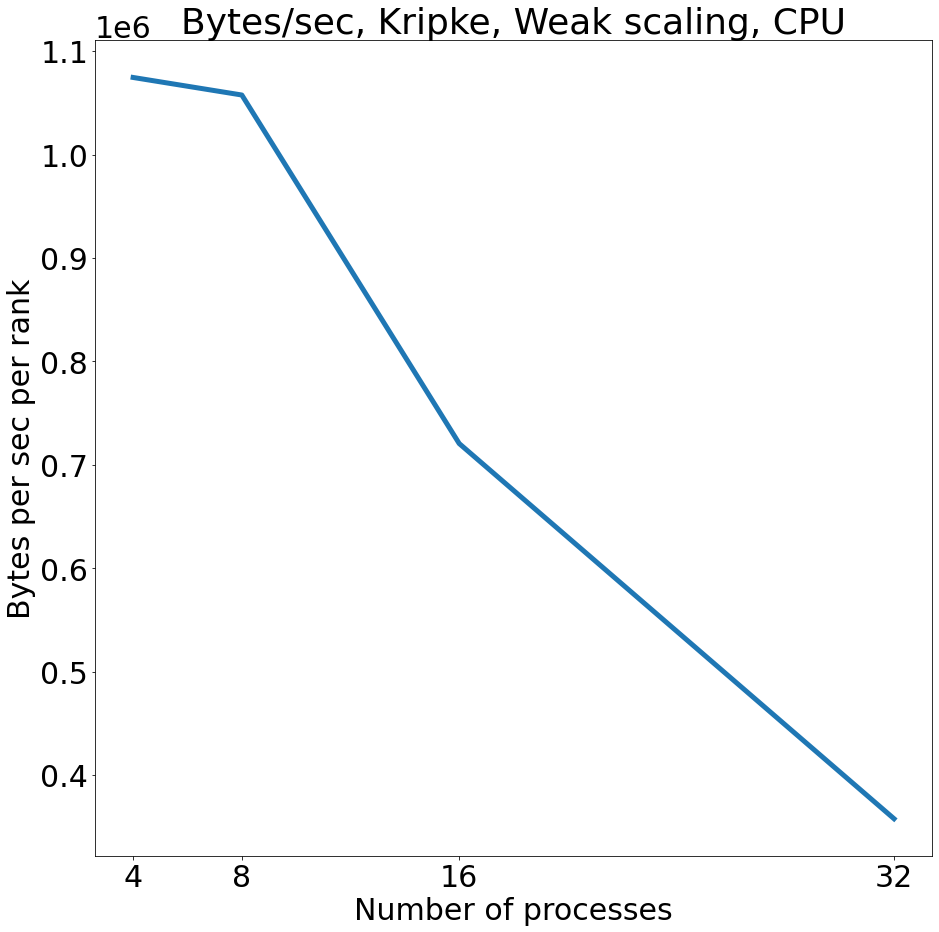

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

#amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
#kripke_node_weak_filtered = kripke_node_weak[kripke_node_weak['mpi.world.size'] != 4]

#amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Bytes per sec')
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax, y='Bytes per sec', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Bytes/sec, Kripke, Weak scaling, CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Bytes per sec per rank')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([4, 8, 16, 32], ['4', '8', '16', '32'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Bytes per sec AMG_Kripke_weak_cpu_25.png", facecolor='white', transparent=False)

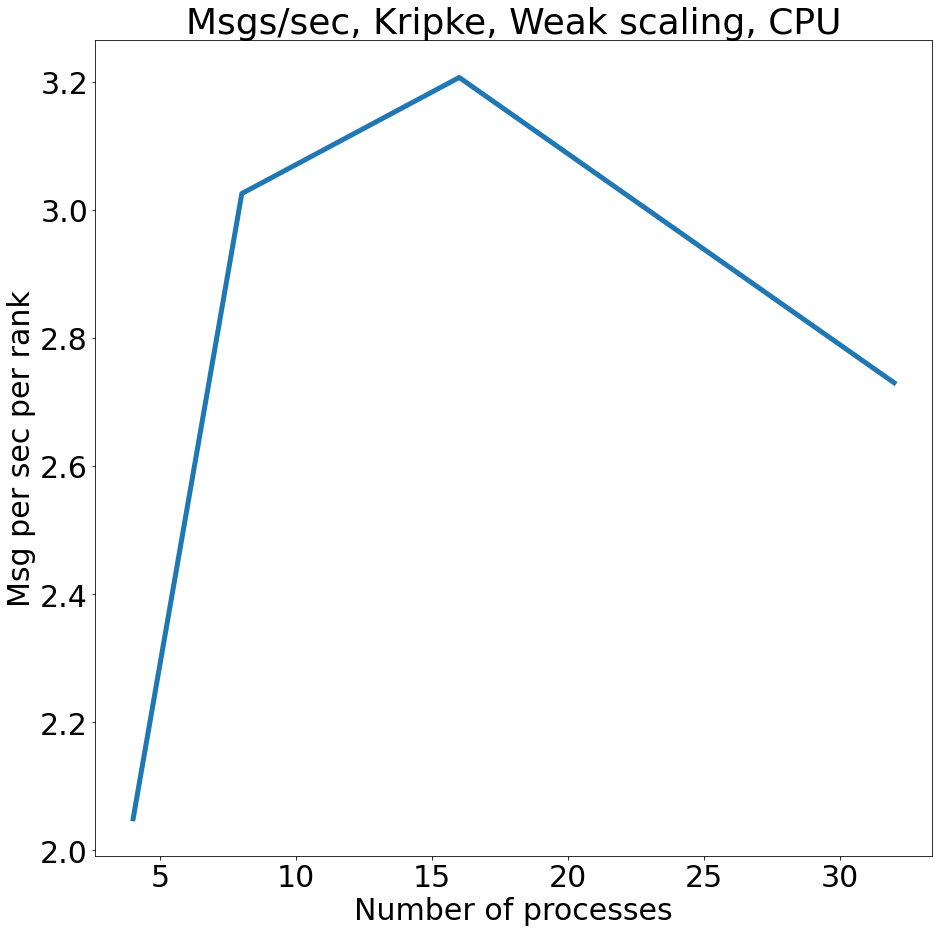

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

#amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
#kripke_node_weak_filtered = kripke_node_weak[kripke_node_weak['mpi.world.size'] != 4]

#amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Bytes per sec')
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax, y='Msg sent per sec', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Msgs/sec, Kripke, Weak scaling, CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Msg per sec per rank')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

#ax[0].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Msgs per sec AMG_Kripke_weak_cpu_25.png", facecolor='white', transparent=False)

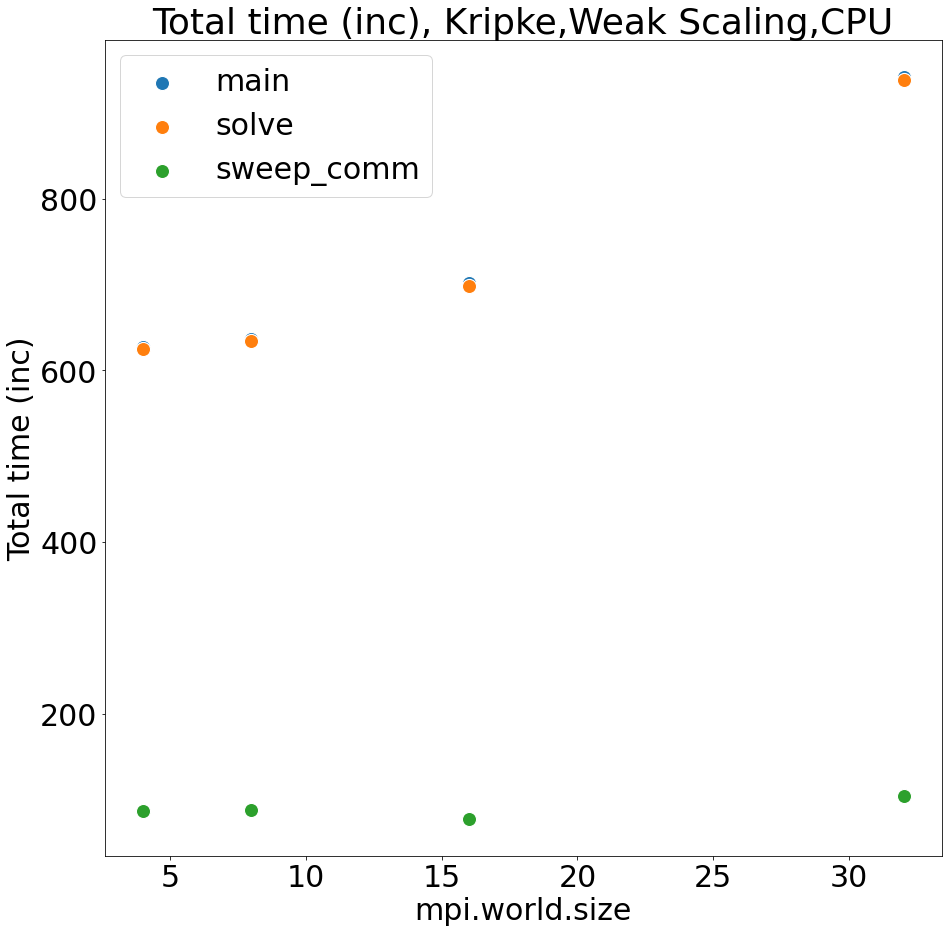

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


#amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
#amg_node_weak_main = tk_amg2023_weak.dataframe.loc[tk_amg2023_weak.get_node("main")]

kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
kripke_node_weak_main = tk_kripke_weak_scaling.dataframe.loc[tk_kripke_weak_scaling.get_node("main")]

#amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
#amg_node_strong_main = tk_amg2023.dataframe.loc[tk_amg2023.get_node("main")]
kripke_node_strong = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("solve")]
kripke_node_strong_main = tk_kripke_strong_scaling.dataframe.loc[tk_kripke_strong_scaling.get_node("main")]

#amg_node_strong_halo = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("halo_exchange")]
kripke_node_strong_halo = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("sweep_comm")]
kripke_node_weak_halo = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("sweep_comm")]
#amg_node_weak_halo = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("halo_exchange")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.scatterplot(data=amg_node_weak_main, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="main", s=200)
#sns.scatterplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="hypre_BoomerAMGSolve", s=200)
#sns.scatterplot(data=amg_node_weak_halo, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="halo_exchange", s=200)

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.scatterplot(data=kripke_node_weak_main, x='mpi.world.size', ax=ax, y='Total time (inc)', label="main", s=200)
sns.scatterplot(data=kripke_node_weak, x='mpi.world.size', ax=ax, y='Total time (inc)', label="solve", s=200)
sns.scatterplot(data=kripke_node_weak_halo, x='mpi.world.size', ax=ax, y='Total time', label="sweep_comm", s=200)

#ax[0].set_title('Total time (inc), AMG,Weak Scaling,CPU')
ax.set_title('Total time (inc), Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_yscale("log", base=2)
#ax[1].set_yscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax.set_ylabel('Total time (inc)')
ax.set_ylabel('Total time (inc)')
#ax[0].set_ylim(0, 100)
#ax[1].set_ylim(0, 1800)

#ax[0].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax[1].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

#plt.legend(loc='lower right')

# Display the plot
plt.show()
fig.savefig("Total time (inc)_AMG_Kripke_cpu.png", facecolor='white', transparent=False)

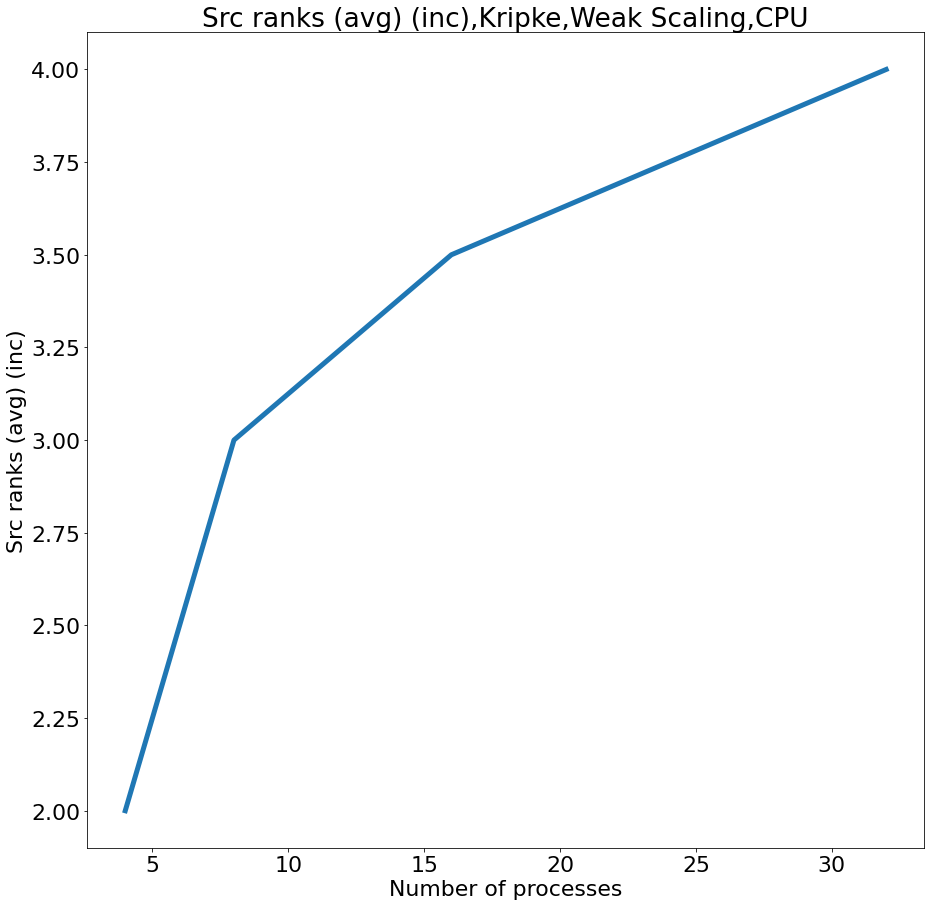

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

#amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

#amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Src ranks (avg) (inc)', linewidth=4)

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax, y='Src ranks (avg) (inc)', linewidth=5)

#ax[0].set_title('Src ranks (avg) (inc),AMG,Weak Scaling,CPU')
ax.set_title('Src ranks (avg) (inc),Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Src ranks (avg) (inc)')
ax.set_ylabel('Src ranks (avg) (inc)')
#ax[0].set_ylim(0,175)
#ax[1].set_ylim(0,0.12)

#ax[0].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax[1].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Src ranks (avg) (inc) AMG_Kripke_cpu.png", facecolor='white', transparent=False)

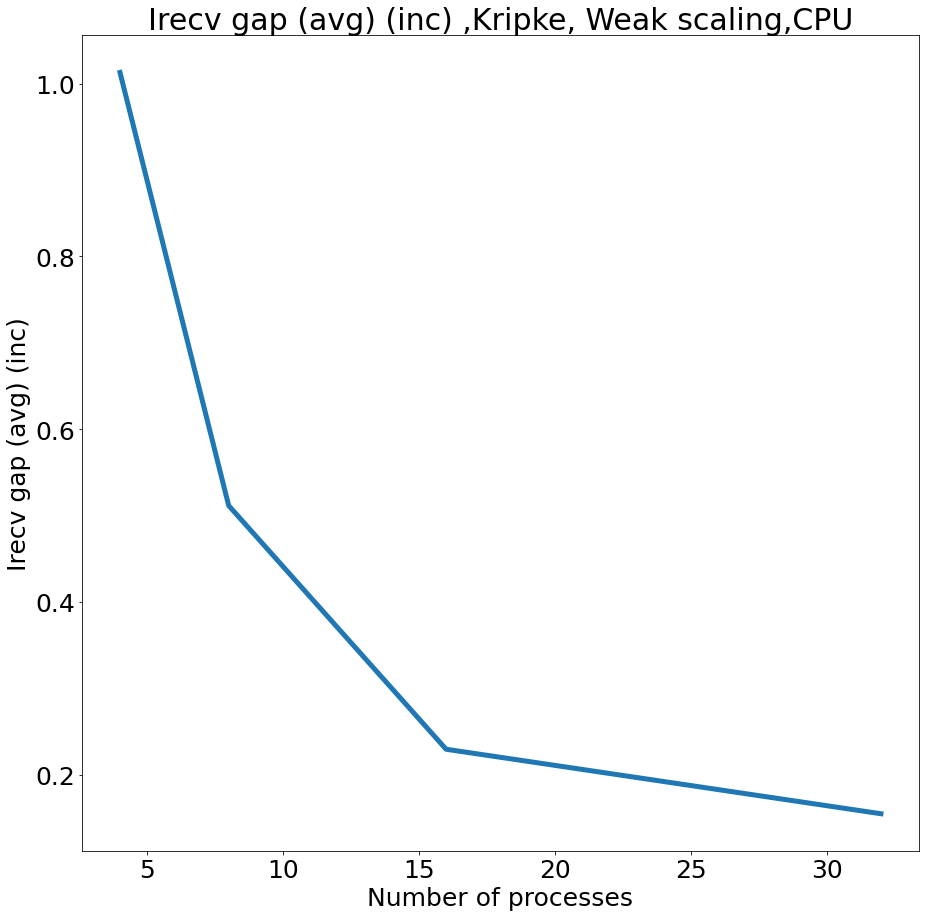

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})

#amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
#kripke_node_weak_filtered = kripke_node_weak[kripke_node_weak['mpi.world.size'] != 4]

#amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke_strong.dataframe.loc[filtered_tk_kripke_strong.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Irecv gap (avg) (inc)')
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax, y='Irecv gap (avg) (inc)', linewidth=5)

#ax[0].set_title('Irecv gap (avg) (inc),AMG,Weak scaling,CPU')
ax.set_title('Irecv gap (avg) (inc) ,Kripke, Weak scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Irecv gap (avg) (inc)')
ax.set_ylabel('Irecv gap (avg) (inc)')
#ax[0].set_ylim(0,80000)
#ax[1].set_ylim(0,40000)


# Display the plot
plt.show()
fig.savefig("Irecv gap (max) (inc) AMG_Kripke_weak_cpu.png", facecolor='white', transparent=False)

In [7]:
print(tk_laghos_weak_scaling.tree(metric_column="Total time"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

0.010 MPI_Comm_dup
0.000 MPI_Finalized
0.000 MPI_Initialized
259767.000 main
├─ 5.321 Bcast byNeighbor
│  └─ 5.318 halo_exchange
│     ├─ 0.007 MPI_Irecv
│     ├─ 0.048 MPI_Isend
│     └─ 5.230 MPI_Waitany
├─ 9.605 MPI_Allreduce
├─ 0.613 MPI_Bcast
├─ 0.000 MPI_Finalized
├─ 0.001 MPI_Get_count
├─ 0.001 MPI_Initialized
├─ 0.171 MPI_Iprobe
├─ 0.017 MPI_Irecv
├─ 0.029 MPI_Isend
├─ 0.085 MPI_Recv
├─ 2.321 MPI_Reduce
├─ 17.881 MPI_Scan
├─ 0.089 MPI_Send
├─ 0.186 MPI_Test
├─ 0.340 MPI_Testall
├─ 0.005 MPI_Wait
├─ 0.021 MPI_Waitall
├─ 15.507 MPI_Waitany
├─ 2.663 Reduce byNeighbor
│  └─ 2.659 halo_exchange
│     ├─ 0.005 MPI_Irecv
│     ├─ 0.016 MPI_Isend
│     └─ 2.601 MPI_Waitall
└─ 259493.000 timestep loop
   ├─ 6742.060 Bcast byNeighbor
   │  └─ 6641.000 halo_exchange
   │     ├─ 124.608 MPI_Irecv
   │     

# Laghos Bytes/rank for GPU 

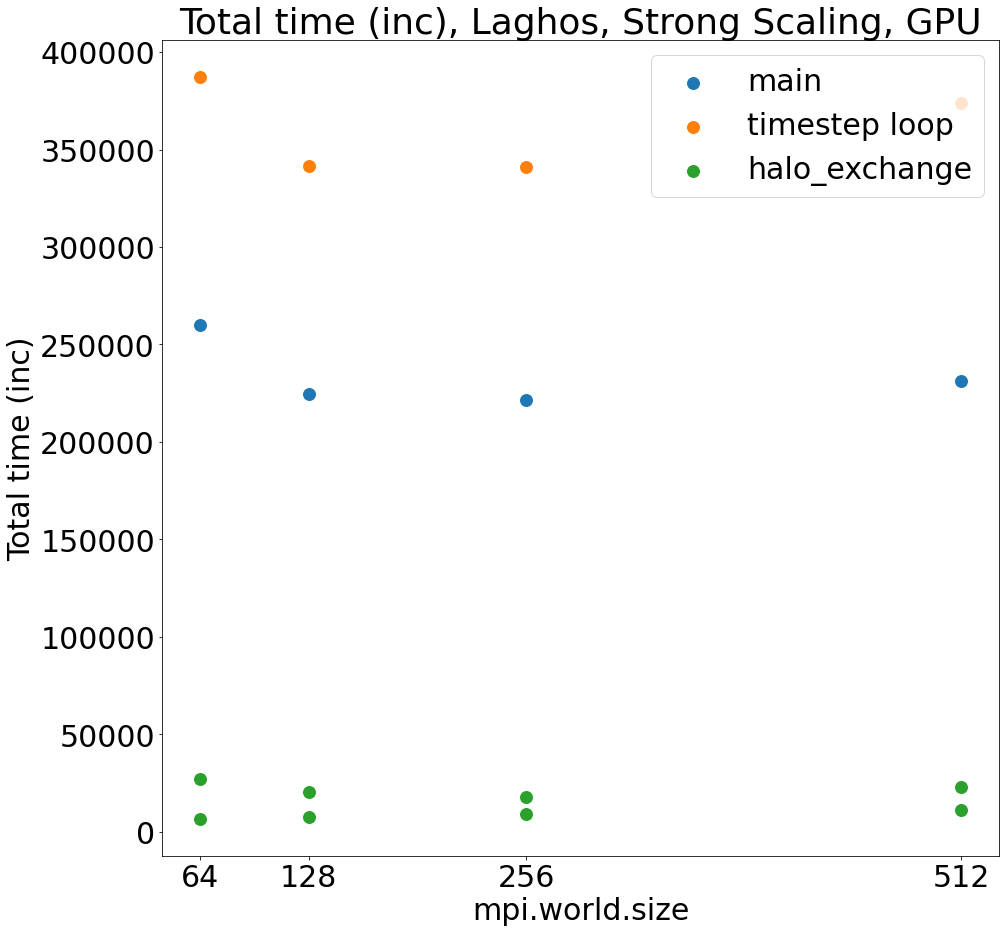

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})



laghos_node_strong = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop")]
laghos_node_strong_main = tk_laghos_strong_scaling.dataframe.loc[tk_laghos_strong_scaling.get_node("main")]



#amg_node_strong_halo = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("halo_exchange")]
laghos_node_strong_halo = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("halo_exchange")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.scatterplot(data=amg_node_weak_main, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="main", s=200)
#sns.scatterplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="hypre_BoomerAMGSolve", s=200)
#sns.scatterplot(data=amg_node_weak_halo, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="halo_exchange", s=200)

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.scatterplot(data=laghos_node_strong_main, x='mpi.world.size', ax=ax, y='Total time (inc)', label="main", s=200)
sns.scatterplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Total time (inc)', label="timestep loop", s=200)
sns.scatterplot(data=laghos_node_strong_halo, x='mpi.world.size', ax=ax, y='Total time', label="halo_exchange", s=200)

#ax[0].set_title('Total time (inc), AMG,Weak Scaling,CPU')
ax.set_title('Total time (inc), Laghos, Strong Scaling, GPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_yscale("log", base=2)
#ax[1].set_yscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax.set_ylabel('Total time (inc)')
ax.set_ylabel('Total time (inc)')
#ax[0].set_ylim(0, 100)
#ax[1].set_ylim(0, 1800)

ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax[1].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

#plt.legend(loc='lower right')

# Display the plot
plt.show()
fig.savefig("Total time (inc)_laghos_gpu_png", facecolor='white', transparent=False)

# Laghos Bytes/rank for CPU 

ValueError: Could not interpret value `Total time (inc)` for parameter `y`

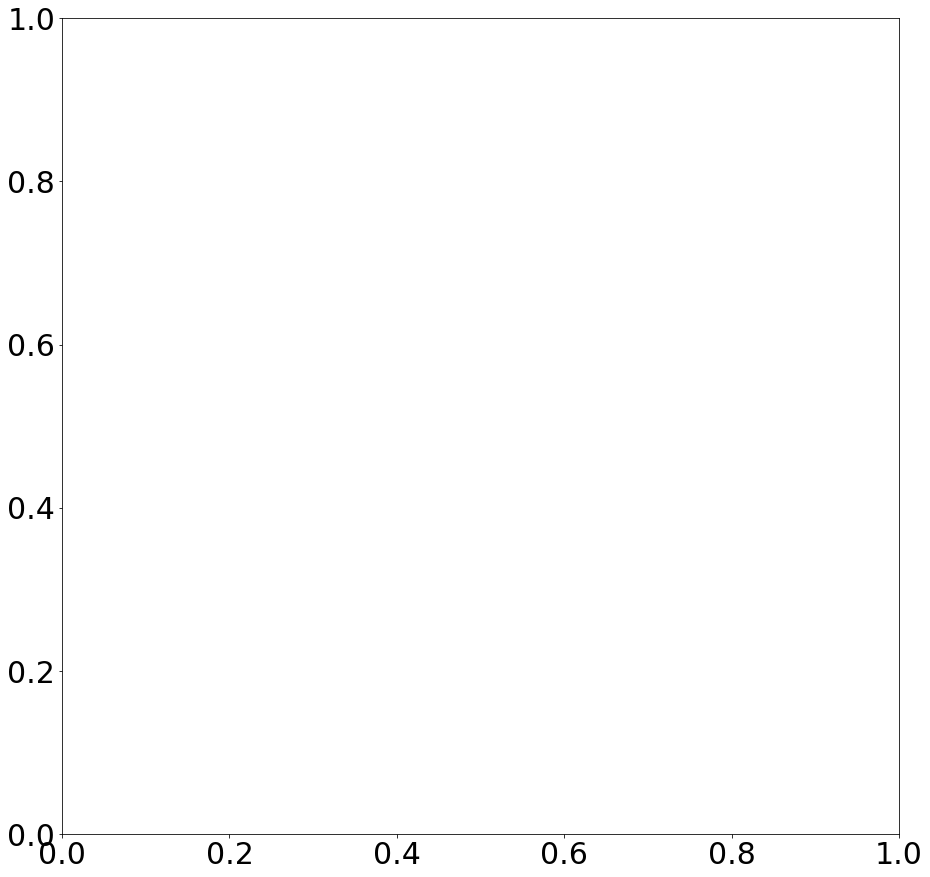

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})



laghos_node_strong = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop")]
laghos_node_strong_main = tk_laghos_strong_scaling_dane.dataframe.loc[tk_laghos_strong_scaling_dane.get_node("main")]



#amg_node_strong_halo = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("halo_exchange")]
laghos_node_strong_halo = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("halo_exchange")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.scatterplot(data=amg_node_weak_main, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="main", s=200)
#sns.scatterplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="hypre_BoomerAMGSolve", s=200)
#sns.scatterplot(data=amg_node_weak_halo, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="halo_exchange", s=200)

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.scatterplot(data=laghos_node_strong_main, x='mpi.world.size', ax=ax, y='Total time (inc)', label="main", s=200)
sns.scatterplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Total time (inc)', label="timestep loop", s=200)
sns.scatterplot(data=laghos_node_strong_halo, x='mpi.world.size', ax=ax, y='Total time', label="halo_exchange", s=200)

#ax[0].set_title('Total time (inc), AMG,Weak Scaling,CPU')
ax.set_title('Total time (inc), Laghos, Strong Scaling, CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_yscale("log", base=2)
#ax[1].set_yscale("log", base=2)
#ax[0].set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax.set_ylabel('Total time (inc)')
ax.set_ylabel('Total time (inc)')
#ax[0].set_ylim(0, 100)
#ax[1].set_ylim(0, 1800)

ax.set_xticks([112, 224, 448, 896], ['112', '224', '448', '896'])
#ax[1].set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

#plt.legend(loc='lower right')

# Display the plot
plt.show()
fig.savefig("Total time (inc)_laghos_cpu_png", facecolor='white', transparent=False)

# Laghos, Msgs sent per rank, GPU

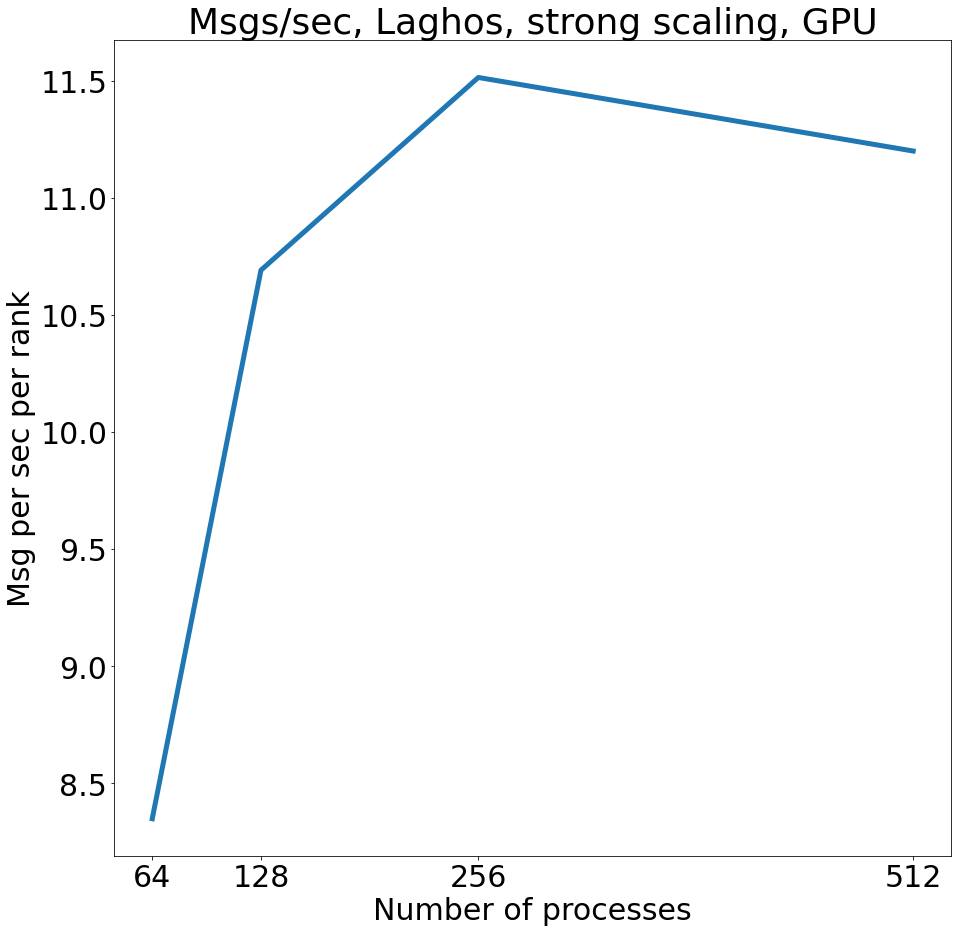

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Msg sent per sec', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Msgs/sec, Laghos, strong scaling, GPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Msg per sec per rank')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Msgs per sec AMG_Kripke_strong_gpu.png", facecolor='white', transparent=False)

# Laghos, Msgs sent per rank, CPU

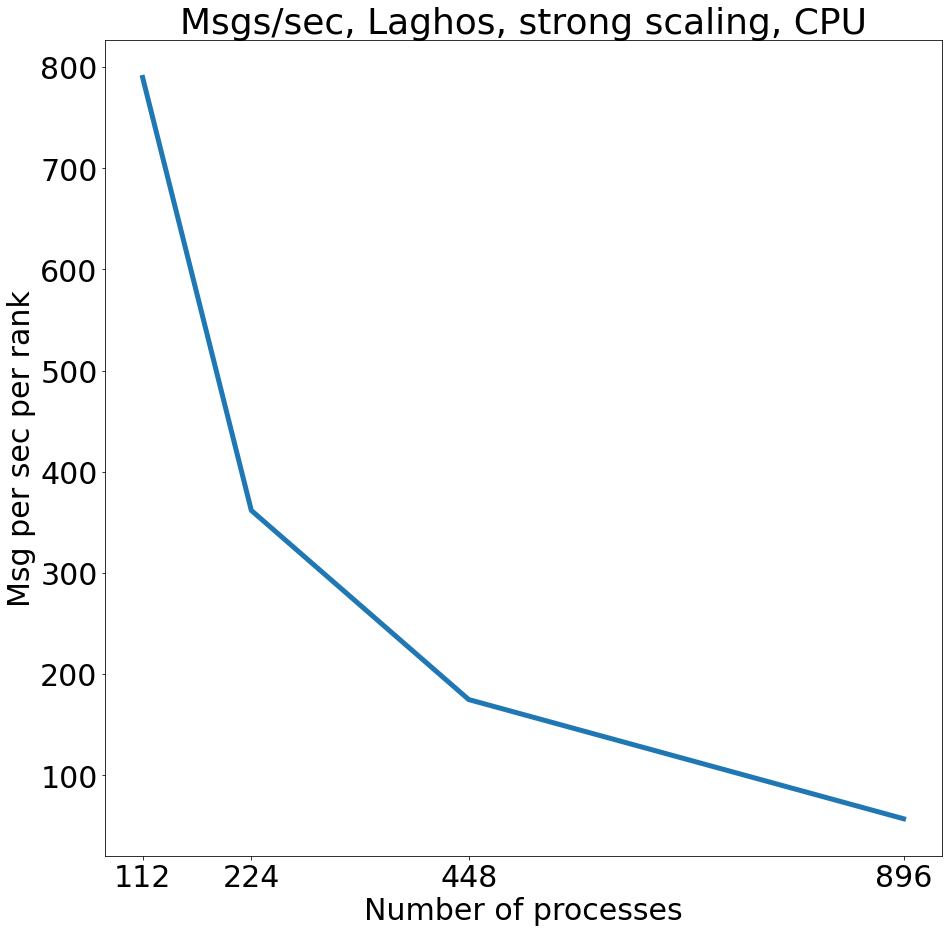

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Msg sent per sec', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Msgs/sec, Laghos, strong scaling, CPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Msg per sec per rank')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([112, 224, 448, 896], ['112', '224', '448', '896'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Msgs per sec AMG_Kripke_strong_cpu.png", facecolor='white', transparent=False)

# Laghos, Bytes sent per rank, GPU

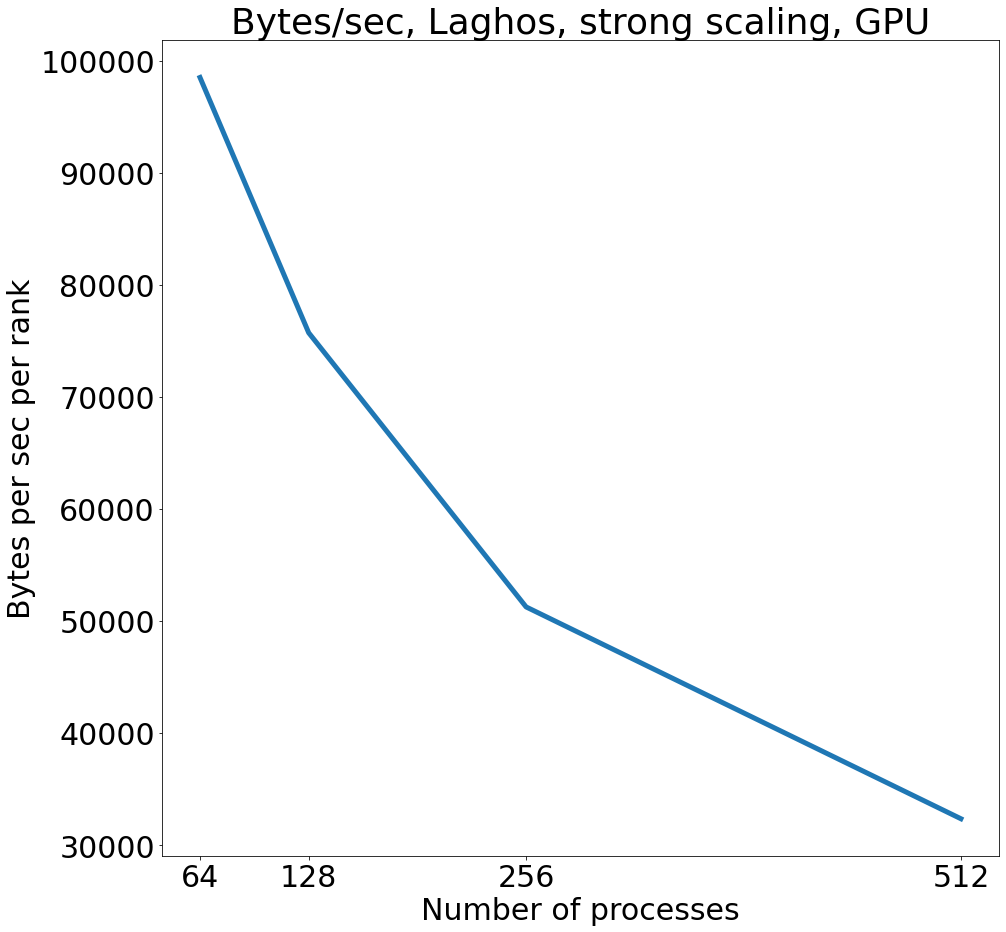

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Bytes per sec', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Bytes/sec, Laghos, strong scaling, GPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Bytes per sec per rank')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Bytes per sec AMG_Kripke_strong_gpu.png", facecolor='white', transparent=False)

# Laghos, Bytes sent per rank, CPU

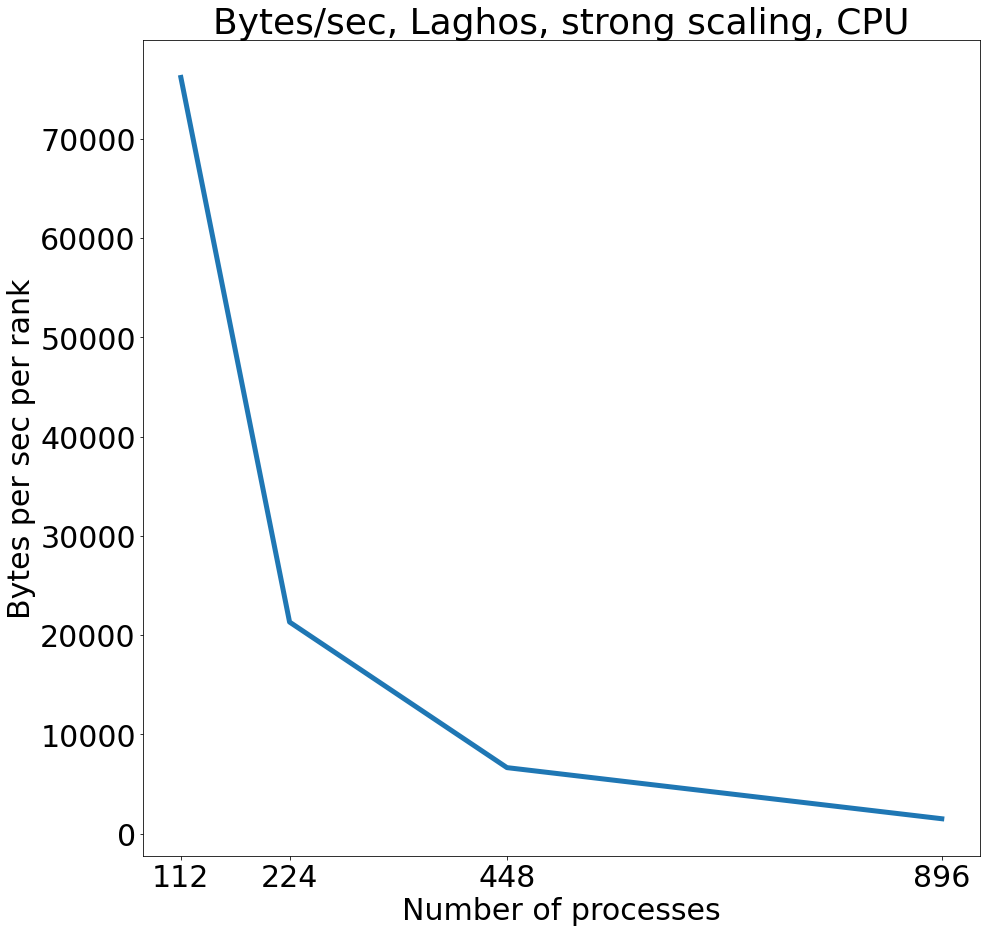

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Bytes per sec', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Bytes/sec, Laghos, strong scaling, CPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Bytes per sec per rank')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([112, 224, 448, 896], ['112', '224', '448', '896'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Bytes per sec AMG_Kripke_strong_cpu.png", facecolor='white', transparent=False)

# Laghos, Irecv gap sent per rank, GPU

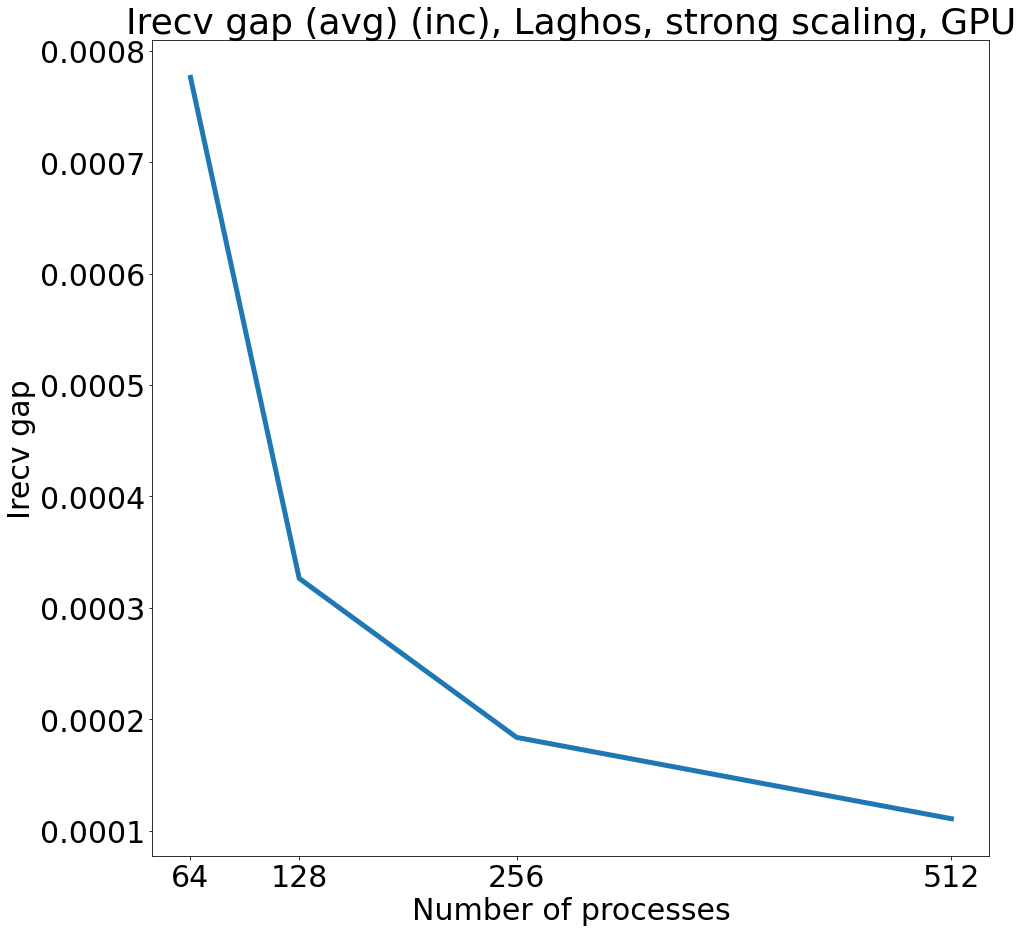

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Irecv gap (avg) (inc)', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Irecv gap (avg) (inc), Laghos, strong scaling, GPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Irecv gap')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Irecv gap_laghos_gpu.png", facecolor='white', transparent=False)

# Laghos, Irecv gap sent per rank, CPU

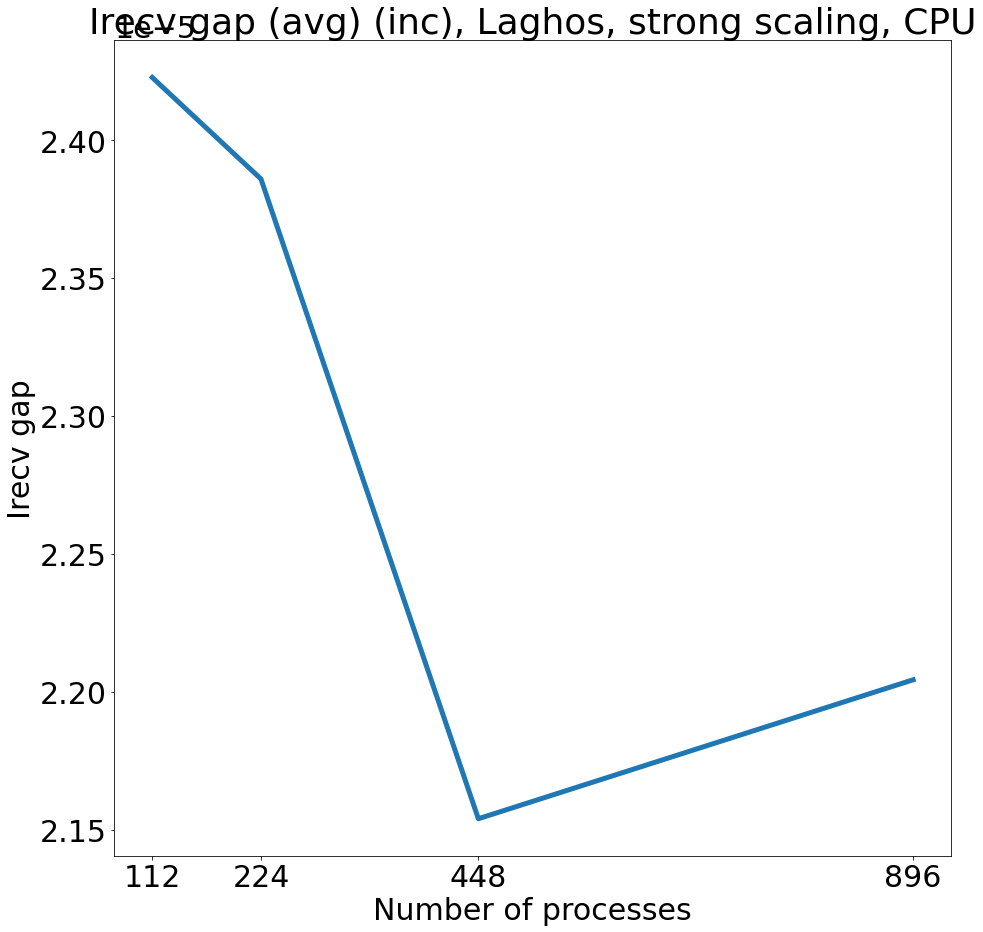

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Irecv gap (avg) (inc)', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Irecv gap (avg) (inc), Laghos, strong scaling, CPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Irecv gap')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([112, 224, 448, 896], ['112', '224', '448', '896'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("Irecv gap_laghos_cpu.png", facecolor='white', transparent=False)

# Laghos Src ranks (avg) (inc), GPU 

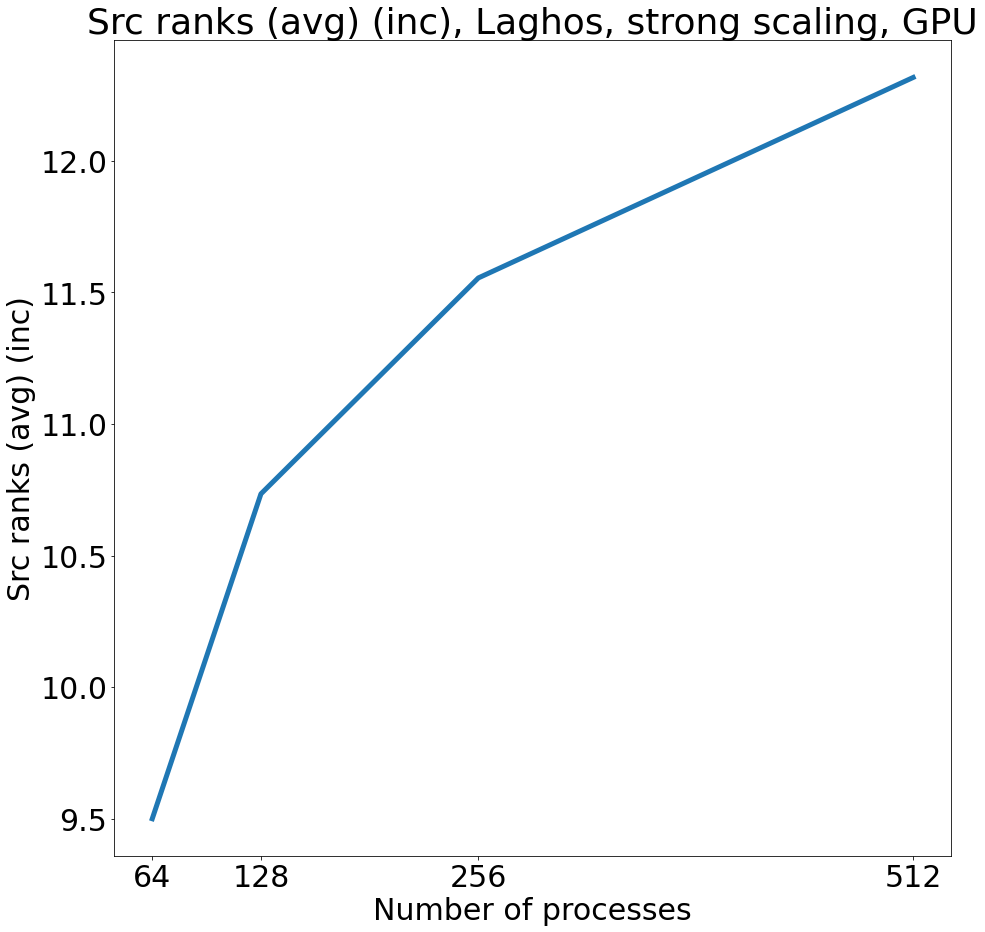

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Src ranks (avg) (inc)', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Src ranks (avg) (inc), Laghos, strong scaling, GPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Src ranks (avg) (inc)')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("src_ranks_laghos_gpu.png", facecolor='white', transparent=False)

# Laghos Src ranks (avg) (inc), CPU 

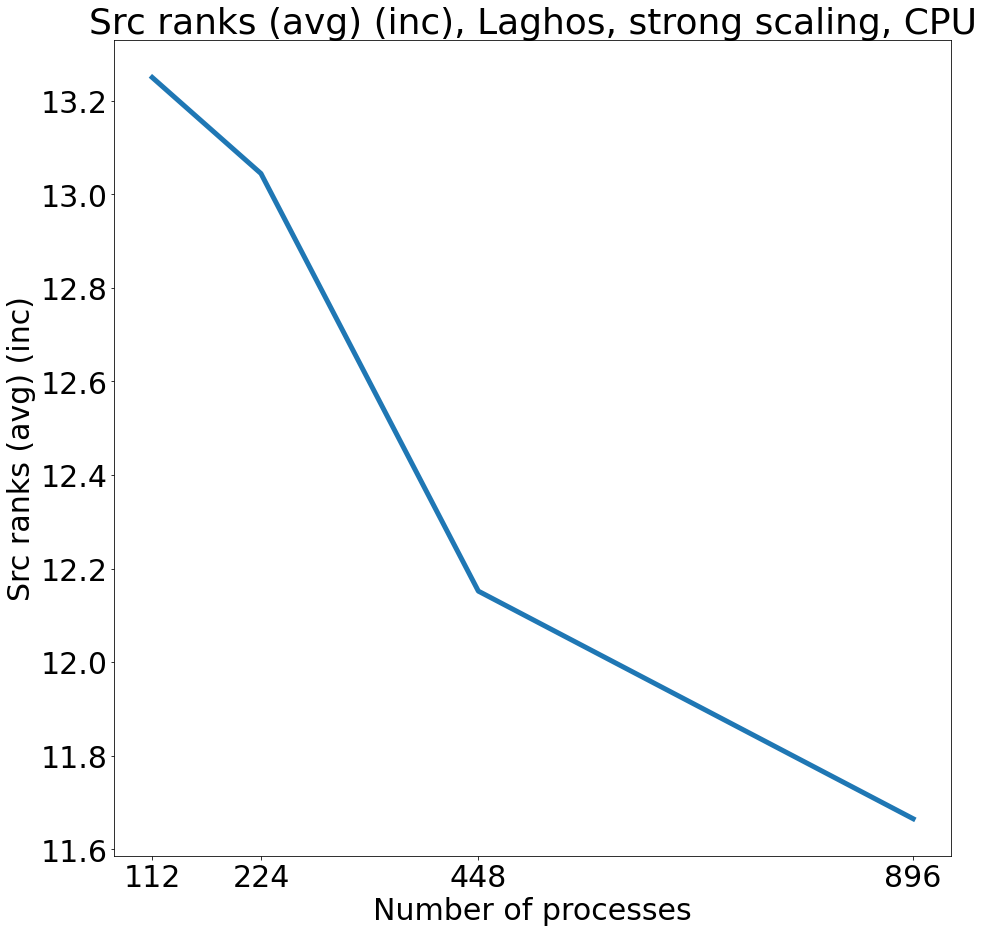

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Src ranks (avg) (inc)', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Src ranks (avg) (inc), Laghos, strong scaling, CPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Src ranks (avg) (inc)')
#ax[0].set_ylim(0,80000)
#ax.set_ylim(0,80000)

ax.set_xticks([112, 224, 448, 896], ['112', '224', '448', '896'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("src_ranks_laghos_cpu.png", facecolor='white', transparent=False)

# Laghos Dst ranks (avg) (inc), GPU 

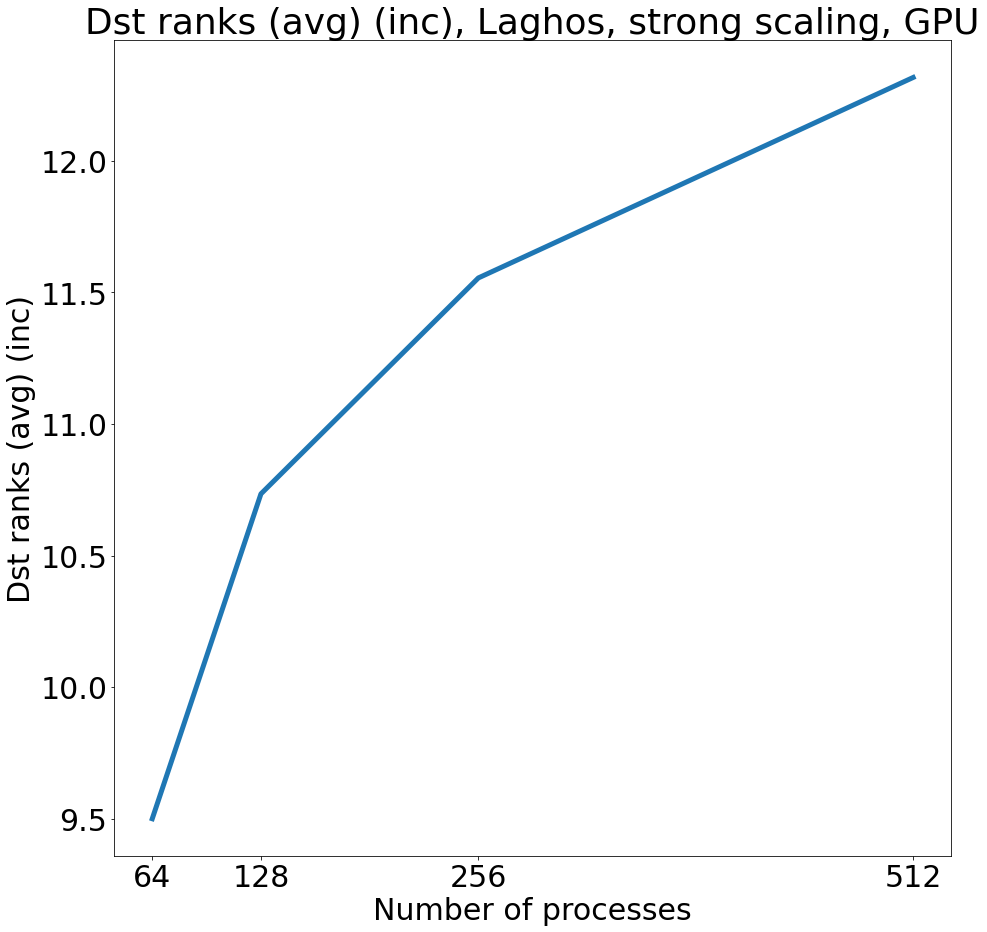

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong.dataframe.loc[filtered_tk_laghos_strong.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Dst ranks (avg) (inc)', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Dst ranks (avg) (inc), Laghos, strong scaling, GPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Dst ranks (avg) (inc)')
#ax.set_ylim(0,13)
#ax.set_ylim(0,80000)

ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("dst_ranks_laghos_gpu.png", facecolor='white', transparent=False)

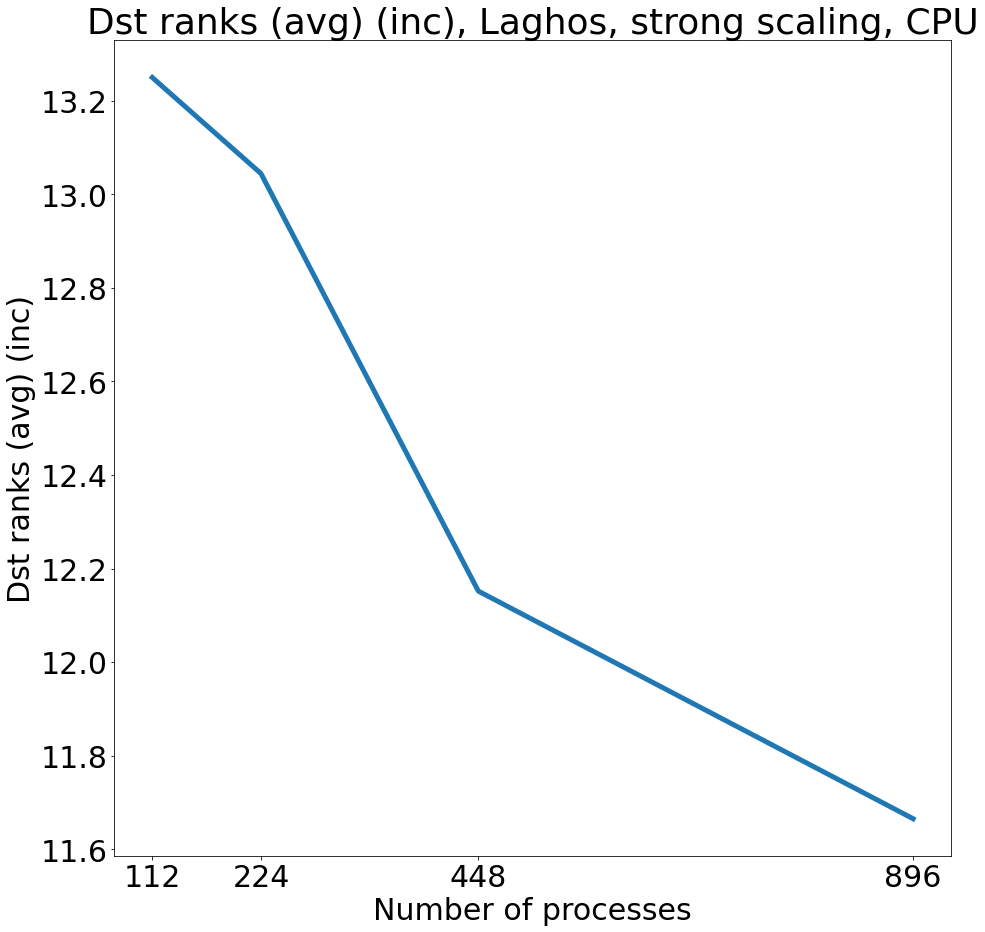

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})


laghos_node_strong = filtered_tk_laghos_strong_dane.dataframe.loc[filtered_tk_laghos_strong_dane.get_node("timestep loop")]

fig, ax = plt.subplots(1,1, figsize=(15, 15), sharey=False)

sns.lineplot(data=laghos_node_strong, x='mpi.world.size', ax=ax, y='Dst ranks (avg) (inc)', linewidth=5)

#ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax.set_title('Dst ranks (avg) (inc), Laghos, strong scaling, CPU')

ax.set_xlabel('Number of processes')
#ax[0].set_ylabel('Bytes per sec per rank')
ax.set_ylabel('Dst ranks (avg) (inc)')
#ax.set_ylim(0,13)
#ax.set_ylim(0,80000)

ax.set_xticks([112, 224, 448, 896], ['112', '224', '448', '896'])
#ax.set_xticks([64, 128, 256, 512], ['64', '128', '256', '512'])

# Display the plot
plt.show()
fig.savefig("dst_ranks_laghos_cpu.png", facecolor='white', transparent=False)